# **-2조-**

## **1. 경사하강법(25점)**

### 1-1. 함수의 최소값을 찾기 위한 경사 하강법에서, 학습률(learning rate)이 너무 높으면 어떤 문제가 발생할 수 있나요? (2점)

A) 알고리즘이 더 빨리 수렴하게 된다.

B) 최소값을 지나쳐 발산할 수 있다.

C) 알고리즘이 너무 느리게 진행된다.

D) 경사 하강법이 적용되지 않는다.

답안) b

### 1-2. 경사 하강법에서 '배치(batch)'란 무엇을 의미하나요? (2점)

A) 전체 데이터 세트

B) 하나의 데이터 포인트

C) 데이터 세트의 부분 집합

D) 학습률

답안) d

### 1-3. Gradient Descent without PyTorch (11점)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

- yourCode를 입력해주세요!

In [2]:
def Rosenbrock(x1, x2):
    return (1-x1)**2 + 100*(x2-x1**2)**2

def Rosenbrock_Diff(x1, x2):
    df_dx1 = -2 * (1 - x1) - 400 * x1 * (x2 - x1**2)
    df_dx2 = 200 * (x2 - x1**2)
    return df_dx1, df_dx2

In [3]:
x1 = np.linspace(-1.5, 1.5)
x2 = np.linspace(-1, 3)
X1, X2 = np.meshgrid(x1,x2)
Y = Rosenbrock(X1, X2)

In [4]:
import numpy as np

numItr = 50
thetas = np.zeros([2, numItr])
thetas[:,0] = [2, 2]  # 초기값 설정
h = 0.5

for i in range(numItr-1):
    derivX1, derivX2 = Rosenbrock_Diff(thetas[0,i], thetas[1,i])
    
    scale = np.sqrt(derivX1**2 + derivX2**2)
    derivX1 = derivX1 / scale
    derivX2 = derivX2 / scale
    thetas[0,i+1] = thetas[0,i] - h * derivX1
    thetas[1,i+1] = thetas[1,i] - h * derivX2

In [5]:
thetas1, thetas2 = thetas[0,:], thetas[1,:]
z = []
for i in range(len(thetas1)):
    z.append(Rosenbrock(thetas1[i], thetas2[i]))
    if i%10 == 0:
        print('%dth Iteration | Rosenbrock(%.3f, %.3f) = %.5f'%(i, thetas1[i], thetas2[i], Rosenbrock(thetas1[i], thetas2[i])))

0th Iteration | Rosenbrock(2.000, 2.000) = 401.00000
10th Iteration | Rosenbrock(0.936, 2.029) = 132.88233
20th Iteration | Rosenbrock(0.764, 1.665) = 116.94503
30th Iteration | Rosenbrock(0.934, 0.558) = 9.85465
40th Iteration | Rosenbrock(0.231, -0.052) = 1.69501


출력 답안)<br>
0th Iteration | Rosenbrock(2.000, 2.000) = 401.00000<Br>
10th Iteration | Rosenbrock(0.936, 2.029) = 132.88233<br>
20th Iteration | Rosenbrock(0.764, 1.665) = 116.94503<br>
30th Iteration | Rosenbrock(0.934, 0.558) = 9.85465<br>
40th Iteration | Rosenbrock(0.231, -0.052) = 1.69501<br>


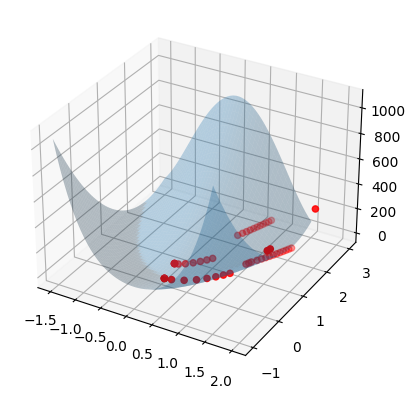

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thetas1, thetas2, z, s=20, color='red')
ax.plot_surface(X1, X2, Y, alpha=0.3)
plt.show()

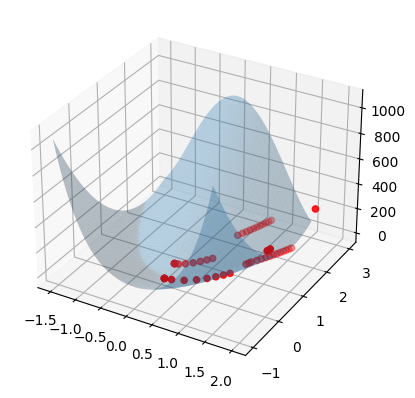

### 1-4. Gradient Descent with PyTorch (10점)

In [7]:
def Rosenbrock(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

- yourCode를 입력해주세요!

In [8]:
import torch
import torch.optim as optim

def minimize(function, initial_parameters, numEpoch, learningRate):
    list_params = []
    params = initial_parameters
    params = torch.tensor(initial_parameters, requires_grad=True)
    optimizer =optim.SGD([params], lr=learningRate)

    for i in range(numEpoch):
        objectiveValue = function(params)
        optimizer.zero_grad()
        objectiveValue.backward() 
        optimizer.step()
        list_params.append(params)

        if (i+1) % 100 == 0:
            print('%dth Iteration | Objective value = %.4f'%(i+1, objectiveValue.detach().cpu()))

    return params, list_params

In [9]:
starting_point = torch.tensor([2.,2.])
num_epoch = 500
learning_rate = 0.001
minimized_params, list_of_params = minimize(Rosenbrock, starting_point, num_epoch, learning_rate)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17320\2337036759.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = torch.tensor(initial_parameters, requires_grad=True)


100th Iteration | Objective value = 0.0726
200th Iteration | Objective value = 0.0688
300th Iteration | Objective value = 0.0652
400th Iteration | Objective value = 0.0617
500th Iteration | Objective value = 0.0583


출력 답안)<br>
100th Iteration | Objective value = 0.0726<br>
200th Iteration | Objective value = 0.0688<br>
300th Iteration | Objective value = 0.0652<br>
400th Iteration | Objective value = 0.0617<br>
500th Iteration | Objective value = 0.0583<br>


# **2. 다항회귀분석과 다중회귀분석 (25점)**

### 2-1. 다음 중 올바른 설명을 모두 고르세요. (2점)

1) 독립변수가 2개 이상인 회귀분석을 다항회귀분석이라 한다.
2) 다항회귀분석은 선형회귀분석에 속한다.
3) scikit learn에서는 다항회귀 API를 제공한다.
4) 다항식의 차수를 과도하게 높게 설정하면 과적합의 위험성이 있다.

답안) 1,3,4

### 2-2. 편향과 분산의 의미와 관계에 관해 설명하세요. (2점)

- 편향 : 예측값과 실제값 사이의 차이를 나타내는 척도
- 분산 : 예측값이 얼마나 변동하는지를 나타내는 척도
- 편향과 분산의 관계 : 트레이드오프 관계

### 2-3. 다음은 scikit learn에서 다항식 계수를 구하는 실습 코드입니다. 코드의 빈칸을 채워 넣으세요. (3점)

- yourCode를 입력해주세요

In [10]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 독립변수 1개
X = np.array([[1],
              [2],
              [3]])

# 편향을 포함하지 않는 2차식 계수
poly = PolynomialFeatures(degree=2, include_bias=False)
print(f"편항을 포함하지 않는 2차식 변환 계수 : \n{poly.fit_transform(X)}")

# 편향을 포함한 2차식 계수
poly = PolynomialFeatures(degree=2, include_bias=True)
print(f"편향을 포함한 2차식 변환 계수 : \n{poly.fit_transform(X)}")

# 편향을 포함한 3차식 계수
poly = PolynomialFeatures(degree=3, include_bias=True)
print(f"편향을 포함한 2차식 변환 계수 : \n{poly.fit_transform(X)}")

편항을 포함하지 않는 2차식 변환 계수 : 
[[1. 1.]
 [2. 4.]
 [3. 9.]]
편향을 포함한 2차식 변환 계수 : 
[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]
편향을 포함한 2차식 변환 계수 : 
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


출력 답안)<br>
편항을 포함하지 않는 2차식 변환 계수 : <br>
[[1. 1.]<br>
 [2. 4.]<br>
 [3. 9.]]<br>
편향을 포함한 2차식 변환 계수 : <br>
[[1. 1. 1.]<br>
 [1. 2. 4.]<br>
 [1. 3. 9.]]<br>
편향을 포함한 2차식 변환 계수 : <br>
[[ 1.  1.  1.  1.]<br>
 [ 1.  2.  4.  8.]<br>
 [ 1.  3.  9. 27.]]<br>


In [11]:
# 독립변수 2개
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# 편향과 상호작용항을 포함한 2차식 계수
poly = PolynomialFeatures(degree=2, include_bias=True,  interaction_only=False)
print(f"편향을 포함한 3차식 변환 계수 : \n{poly.fit_transform(X)}")

# 두 독립변수의 3차 상호작용항만을 출력
poly = PolynomialFeatures(degree=3, include_bias=False , interaction_only=True)
print(f"두 독립변수의 3차 상호작용항 : \n{poly.fit_transform(X)}")

편향을 포함한 3차식 변환 계수 : 
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]
두 독립변수의 3차 상호작용항 : 
[[ 1.  2.  2.]
 [ 3.  4. 12.]
 [ 5.  6. 30.]]


출력 답안)<br>
편향을 포함한 3차식 변환 계수 : <br>
[[  1.   1.   2.   1.   2.   4.   1.   2.   4.   8.]<br>
 [  1.   3.   4.   9.  12.  16.  27.  36.  48.  64.]<br>
 [  1.   5.   6.  25.  30.  36. 125. 150. 180. 216.]]<br>
두 독립변수의 3차 상호작용항 : <br>
[[ 1.  2.  2.]<br>
 [ 3.  4. 12.]<br>
 [ 5.  6. 30.]]<br>

### 2-4. Pipeline 객체를 활용해 다음 3차 다항식의 예시에서 회귀계수를 구하세요. (3점)

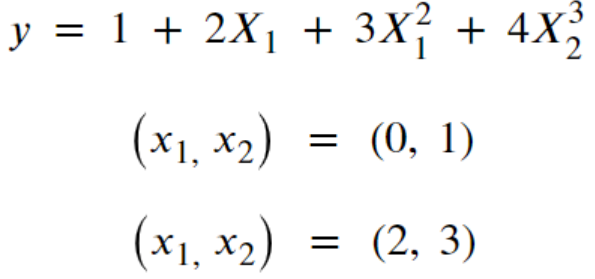

- yourCode를 입력해주세요

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

X = np.array([[0,1],[2,3]])
y = np.array([5,125])

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


출력 답안)<Br>
Polynomial 회귀 계수<Br>
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]<Br>

### 2-5. 다음은 간단한 예제를 통해 단순선형회귀와 다항회귀를 비교해 보는 코드입니다. 코드의 빈칸을 채우세요. (3점)

In [17]:
###그대로 실행하세요###

import numpy as np
import pandas as pd

# 독립변수 : 농어의 길이, 높이, 너비 (출처 : 한빛미디아)
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

# 종속변수 : 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

print('길이\t높이\t너비')
print(perch_full)

길이	높이	너비
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40

먼저, 농어의 길이, 높이, 너비를 이용해 무게를 예측해보는 단순선형회귀 모형을 세워봅니다.

In [18]:
### 그대로 실행하세요 ###
from sklearn.model_selection import train_test_split

# train-test split
X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, test_size=0.2, random_state=42)

- yourCode를 입력해주세요

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

# 단순선형회귀 훈련 데이터의 정확도
print(f"단순선형회귀 train accuracy : {lr.score(X_train, y_train)}")

# 단순선형회귀 테스트 데이터의 정확도
print(f"단순선형회귀 test accuracy : {lr.score(X_test, y_test)}")

단순선형회귀 train accuracy : 0.9514691361031922
단순선형회귀 test accuracy : 0.8931658636745737


출력 답안)<br>
단순선형회귀 train accuracy : 0.9514691361031922<br>
단순선형회귀 test accuracy : 0.8931658636745738<br>

test 정확도가 약 89.32%로 나쁘지 않음을 볼 수 있습니다. 이번에는 2차 다항회귀를 이용해 농어의 무게를 예측해봅시다.

- yourCode를 입력해주세요

In [20]:
# 편향은 포함하지 않고 2차식으로 변형
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 2차 다항회귀 훈련 데이터의 정확도
print(f"2차 다항회귀 train accuracy : {lr.score(X_train_poly, y_train)}")

# 2차 다항회귀 테스트 데이터의 정확도
print(f"2차 다항회귀 test accuracy : {lr.score(X_test_poly, y_test)}")

2차 다항회귀 train accuracy : 0.9900974417605037
2차 다항회귀 test accuracy : 0.9766805886149219


출력 답안) <br>
2차 다항회귀 train accuracy : 0.9900974417605038<br>
2차 다항회귀 test accuracy : 0.9766805886149292<br>

2차식을 이용해 다항회귀를 진행하였더니 test accuracy가 약 97.67%로 단순선형회귀에 비해 크게 상승한 것을 확인할 수 있습니다. 차수를 더 높이면 test accuracy가 100%가 될 수도 있지 않을까요? 5차식을 이용해 다항회귀를 진행해봅시다.

- yourCode를 입력해주세요

In [21]:
# 편향은 포함하지 않고 5차식으로 변형
poly = PolynomialFeatures(degree=5, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#최대 차수가 5인 데이터를 훈련시킨다.
lr.fit(X_train_poly, y_train)

# 5차 다항회귀 훈련 데이터의 정확도
print(f"5차 다항회귀 train accuracy : {lr.score(X_train_poly, y_train)}")

# 5차 다항회귀테스트 데이터의 정확도
print(f"5차 다항회귀 test accuracy : {lr.score(X_test_poly, y_test)}")

5차 다항회귀 train accuracy : 0.9999999999220485
5차 다항회귀 test accuracy : -167.27007458261156


출력 답안)<br>
5차 다항회귀 train accuracy : 0.9999999999173265<br>
5차 다항회귀 test accuracy : -167.24205512528476<br>

train accuracy가 99.99%로 모든 sample을 거의 정확하게 예측한 반면, test accuracy는 -167.24라는 터무니없는 수치가 나온 것을 보아 과적합이 발생한 것으로 추측할 수 있습니다.

### 2-6. 다음 중 다중회귀에 대해 알맞지 않은 설명을 고르세요. (3점)

1) 하나의 종속 변수에 여러 개의 독립 변수가 영향을 미치는 경우에 사용된다.
2) 다중공선성은 낮을 수록 좋다.
3) 다중회귀분석에서 사용되는 회귀 계수는 독립 변수의 단위 변화에 따른 종속 변수의 변화량을 나타낸다.
4) 다중회귀분석에서는 주어진 데이터가 선형 관계를 가져야 하며, 비선형 관계를 모델링하기 위해서는 다른 방법을 사용해야 한다.

답안)2

### 2-7. 다음은 다중회귀분석과 다항회귀 분석이 필요한 상황을 무작위로 나열한 것입니다. 두 가지의 분석 방법 중 무엇이 필요한 상황인지 순서대로 나열하세요. (2점)


1. 집의 크기, 위치, 방의 개수 등에 따른 집의 판매 가격을 예측해야 하는 상황
2. 소득 수준에 따른 소비량을 예측해야 하는 상황에서, 소득 수준에 따라 소비량이 증가하다가 일정 수준 이상부터 감소하는 곡선 형태를 띄는 상황
3. 광고 비용, 경쟁사의 가격, 경제 지표 등의 요인을 고려하여 기업의 매출액을 예측해야 하는 상황

답안) 다중, 다항, 다중

### 2-8. 아래 조건에 맞게 Boston_house 데이터의 독립변수 세 가지를 선정하여 다중회귀모델을 학습시키세요.(3점)

### [조건]
- 평균 방의 개수(RM): 6
- 범죄율(CRIM): 0.1
- 학생 당 교사 비율(PTRATIO): 15

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

- yourCode를 입력해주세요

In [23]:
# 데이터 분할
boston = pd.read_csv('./Boston_house.csv')
X = boston[['RM','CRIM','PTRATIO']]
y = boston['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중회귀모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 주어진 조건에 따른 새로운 데이터 생성 후 주택가격 예측
new_data = np.array([[6, 0.1, 15]])  # 평균 방의 개수, 범죄율, 학생 당 교사 비율
predicted_price = model.predict(new_data)


c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 2-9. 위에서 사용한 보스턴 집값 예측 데이터에서 다중공선성이 가장 높은 독립변수 두 가지가 무엇인지 알아보고자 합니다. 상위 5개를 출력하는 아래의 코드를 완성하세요. (4점)

- yourCode를 입력해주세요

In [30]:
# 상관관계 행렬 구하기
correlation_matrix = X.corr()

# 상관관계가 높은 변수 쌍 찾기
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# 상위 5개 출력
print("다중공선성이 가장 높은 독립변수 두 가지:")
print(high_corr_pairs[high_corr_pairs != 1].head(5))

다중공선성이 가장 높은 독립변수 두 가지:
CRIM     PTRATIO    0.289946
PTRATIO  CRIM       0.289946
RM       CRIM      -0.219247
CRIM     RM        -0.219247
RM       PTRATIO   -0.355501
dtype: float64


출력 답안) <br>
다중공선성이 가장 높은 독립변수 두 가지:<br>
TAX  RAD      0.910228<br>
RAD  TAX      0.910228<br>
NOX  DIS      0.769230<br>
DIS  NOX      0.769230<br>
NOX  INDUS    0.763651<br>
dtype: float64




---



# **-3조-**

안녕하세요, 비타민 13기 여러분!🍋<br>
아래부터는 3조의 '규제 선형모델과 회귀 평가지표' 문제입니다.<br>
총 문항은 두 문항이며 각각 n개와 k개의 꼬리 질문이 있습니다.
총 배점은 50점입니다.<br><br>
감사합니다 :)

## **1. 이론**

### 1-1. MSE와 RMSE의 차이를 기능적인 부분에서 서술하시오. (수식적인 부분만 서술할 시, 오답) (3점)

답안) 

### 1-2. 다음은 L2 규제의 식입니다. L2 규제에서의 α는 무엇이고, α의 역할은 무엇인지 서술하시오. (2점)

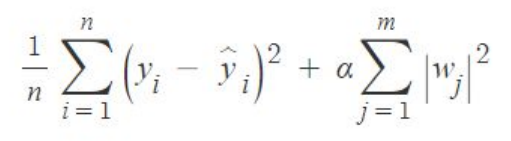

답안) 하이퍼파라미터로, 규제의 강도를 조절한다

### 1-3. Lasso 회귀의 식은 다음과 같다.<br>
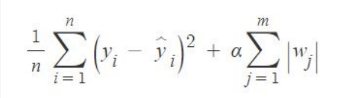
<br>
### 해당 식에서 'ɑ의 역할 설명'에 대해 간략히 서술하시오. (3점)

답안) 모델의 복잡성 조절하는 역할을 한다.

### 1-4. 규제 선형 모델에 대한 올바르지 않은 내용을 모두 골라주세요. (3점) <br>
a) 모델이 과대 적합을 피하여 일반화 성능을 잃지 않도록 가중치를 제한하는 방법을 적용한 모델이다.<br>
b) 규제 선형 모델은 선형 모델의 비용 함수가 과적합이 발생하여 테스트 데이터 셋에서 성능이 저하되는 것을 방지하기 위하여 나왔다.<br>
c) Lasso 회귀는 L1+L2 규제를 활용한다.<br>
d) L1 규제는 불필요한 회귀 계수를 랜덤하게 제거하며 가중치를 0으로 만들어 특성 선택에 활용한다.

답안) b,c

### 1-5. L1 규제와 L2 규제의 차이에 대해 두 줄 내외로 설명하시오. (4점)

답안) L1 규제는 불필요한 회귀 계수를 랜덤하게 제거하여 가중치를 0으로 만들어 특성 선택에 활용, L2 규제는 회귀 계수의 크기를 제한하여 모델의 복잡성을 줄이고 과적합을 방지하는 데 중점

## **2. 실습**

### 2-1. **Ridge Regression**코드를 구현하세요. (6점, 각 2점)

모델 성능 향상을 위해 5-fold 교차 검증을 사용하여 코드를 작성했습니다.

In [31]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [32]:
# 보스턴 주택 가격 데이터셋 로드
boston = fetch_openml(name='boston', version=1, as_frame=False)

X, y = boston.data, boston.target

# Ridge Regression 모델 생성
alphas = [0.01, 0.1, 1, 10, 100, 1000]  # 람다 값 후보

# RidgeCV를 사용하여 최적의 람다 값 찾기
ridge_cv = RidgeCV(alphas=alphas, cv= 5)  # 5-fold 교차 검증 사용
ridge_cv.fit(X, y)
best_alpha = ridge_cv.alpha_
print("최적의 람다 값:", best_alpha)

c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


최적의 람다 값: 100.0


출력 답안) 최적의 람다 값: 100.0

In [33]:
# 최적의 람다 값을 사용하여 모델 재학습
ridge_best = Ridge(alpha= best_alpha)
ridge_best.fit(X, y)

# 교차 검증을 통한 모델 성능 평가
mse_scores_ridge = -cross_val_score(ridge_best, X, y, scoring='neg_mean_squared_error', cv= 5)
print("Ridge Regression 교차 검증 MSE 점수:", mse_scores_ridge.mean())

Ridge Regression 교차 검증 MSE 점수: 30.161384031082786


출력 답안) Ridge Regression 교차 검증 MSE 점수: 30.161384031082786


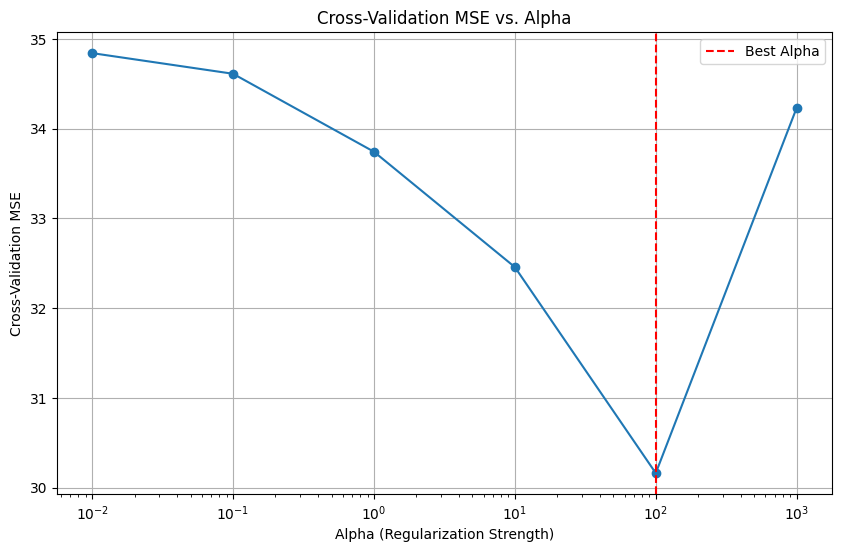

In [34]:
# 각 람다 값에 대한 교차 검증 MSE 점수 저장 및 시각화
mse_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse = -cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5).mean()
    mse_scores.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', linestyle='-')
plt.axvline(x=best_alpha, color='r', linestyle='--', label='Best Alpha')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validation MSE')
plt.title('Cross-Validation MSE vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

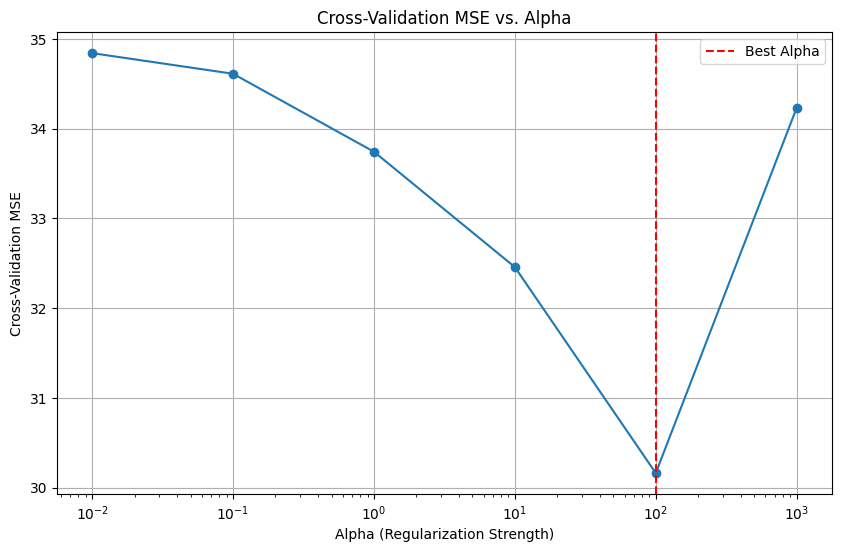

### 2-2. 위의 결과값을 참고하여, MSE의 뜻과 람다값에 따른 모델 복잡성의 관계를 서술하시오. (4점)

답안) MSE가 작을수록 모델의 예측이 실제 값과 가까우며, 더 좋은 성능을 가진 모델을 나타낸다.

### 2-3. 조건에 알맞게 빈칸 코드를 채워주세요. (총 15점)
* Lasso 회귀 모델을 사용하여 훈련시키세요. (1점)
* 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 분할 비율은 훈련 데이터 70%, 테스트 데이터 30%로 설정하세요. (3점)


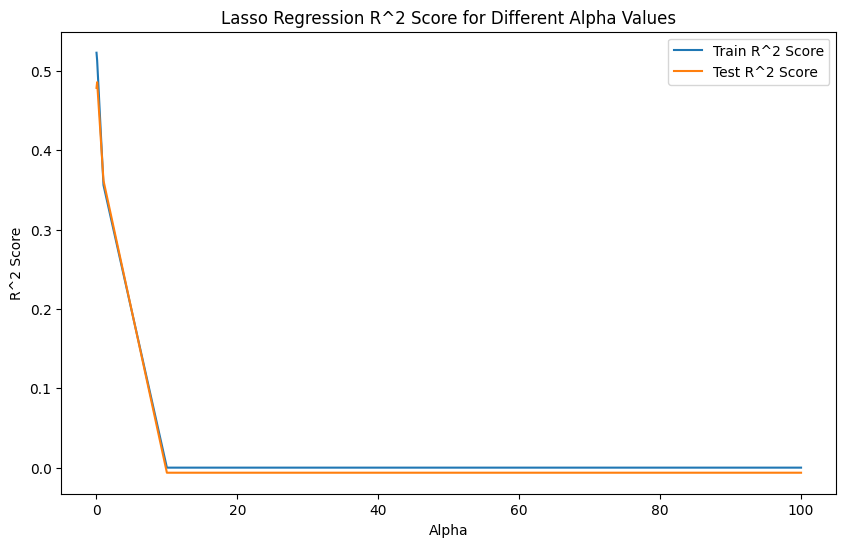


Best Alpha: 0.1
Training set R^2 score: 0.5134140107713475
Test set R^2 score: 0.4859194402036221


In [36]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 데이터 로드
X, y = load_diabetes(return_X_y=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Alpha 값 리스트
alpha_list = [0.01, 0.1, 1, 10, 100]

# R^2 점수를 저장할 리스트
train_r2_scores = []
test_r2_scores = []

# 최적의 alpha 값 찾기
best_alpha = None
best_r2 = -np.inf

for alpha in alpha_list:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # R^2 점수 저장
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    # 최적의 alpha 업데이트
    if test_r2 > best_r2:
        best_r2 = test_r2
        best_alpha = alpha

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(alpha_list, train_r2_scores, label='Train R^2 Score')
plt.plot(alpha_list, test_r2_scores, label='Test R^2 Score')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression R^2 Score for Different Alpha Values')
plt.legend()
plt.show()

print()

# 최적의 alpha 값으로 모델 훈련
model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R^2 점수 출력
print(f"Best Alpha: {best_alpha}")
print(f"Training set R^2 score: {r2_score(y_train, y_train_pred)}")
print(f"Test set R^2 score: {r2_score(y_test, y_test_pred)}")


출력 답안) <br>
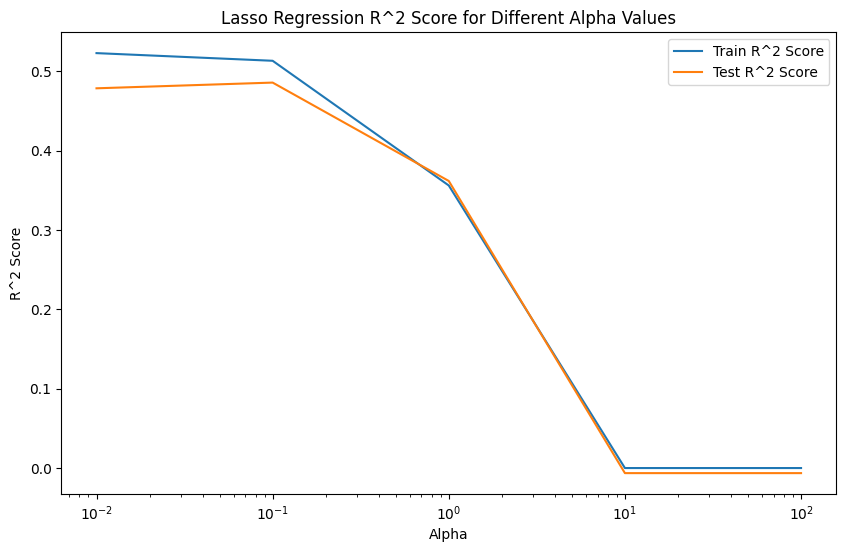
<br>

Best Alpha: 0.1<br>
Training set R^2 score: 0.5134140107713475<br>
Test set R^2 score: 0.4859194402036221

Best Alpha: 0.1
Training set MSE: 2991.667799312659
Test set MSE: 2775.165076183445
Training set MAE: 44.96813073248474
Test set MAE: 41.938631174436246


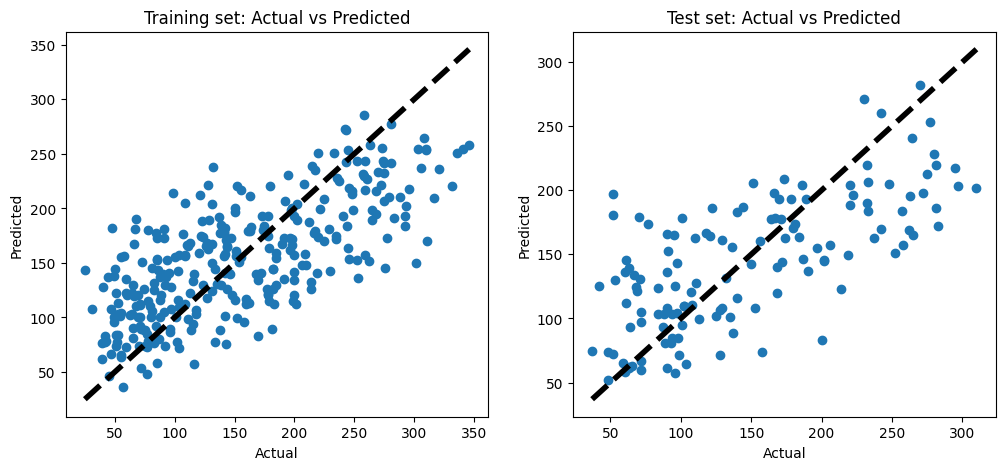

In [37]:
# 성능 평가
print(f"Best Alpha: {best_alpha}")
print(f"Training set MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test set MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Training set MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"Test set MAE: {mean_absolute_error(y_test, y_test_pred)}")

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', linewidth=4)
plt.title('Training set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=4)
plt.title('Test set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

출력 답안)<br>
Best Alpha: 0.1<br>
Training set MSE: 2991.667799312659<br>
Test set MSE: 2775.165076183445<br>
Training set MAE: 44.96813073248474<br>
Test set MAE: 41.938631174436246<br>

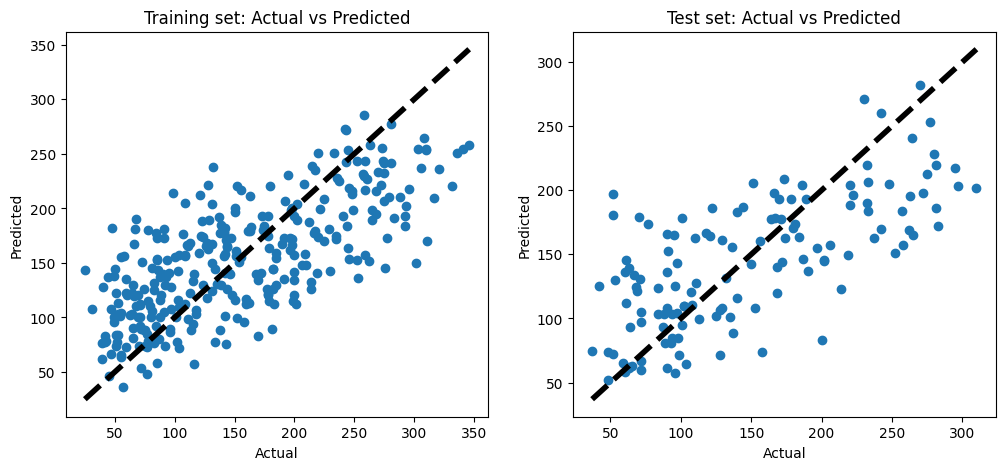

### 2-4. 다음은 엘라스틱넷을 클래스로 직접 구현해 본 예시이다. "???" 부분을 채워 넣어라 ! (5점)

In [38]:
import numpy as np

class ElasticNet:
    def __init__(self, lr=0.01, n_iter=1000, alpha=0.1, l1_ratio=0.5):
        self.lr = lr
        self.n_iter = n_iter
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.w) + self.b
            # 그라디언트 계산
            dw = (-2 * np.dot(X.T, (y - y_pred)) + self.alpha * self.l1_ratio * np.sign(self.w) +
                  self.alpha * (1 - self.l1_ratio) * 2 * self.w) / n_samples
            db = -2 * np.mean(y - y_pred) / n_samples
            # 가중치 업데이트
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [39]:
# 데이터 로드 및 전처리
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 훈련
model = ElasticNet(lr=0.01, n_iter=1000, alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

# 예측 및 성능 평가
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 4.83


출력 답안) Mean Squared Error: 0.55


### 2-5. sklearn을 사용하여 ElasicNet을 구현해본 예시이다. ??? 부분을 채워 넣어라 (5점)

In [40]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = fetch_california_housing()
X = data.data
y = data.target

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ElasticNet 모델 생성
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha는 규제 강도, l1_ratio는 L1 규제의 비율

# 모델 훈련
elastic_net.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = elastic_net.predict(X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 1.04


출력 답안) Mean Squared Error: 1.04